In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
class SequenceGenerator:
    """
    Generates sliding window sequences for LSTM input from the processed DataFrame.
    """
    def __init__(self, df, sequence_length=50, step=10):
        self.df = df.copy()
        self.sequence_length = sequence_length
        self.step = step
    def generate_sequences(self):
        """
        Returns:
            X: np.ndarray of shape (num_sequences, sequence_length, num_features)
            y: np.ndarray of shape (num_sequences,)
        """
        X, y = [], []
        feature_cols = [
    'TimeDelta',
    'SensorID_enc',
    'event_count',
    'progress_ratio',
    'TimeOfDay_enc',
    'SensorType_enc',
    'sensor_value_binary',
    'sensor_value_continuous',
    'sensor_value_phone'
]
        scaler=StandardScaler()
        for col in feature_cols:
            self.df[col] = self.df[col].fillna(0)
            self.df[feature_cols] = scaler.fit_transform(self.df[feature_cols])
        print("Feature scaling complete.")


        # Group by participant and task to avoid mixing data
        for (pid, tid), group in self.df.groupby(['participant_id', 'task_id']):
            group = group.reset_index(drop=True)
            label = group.loc[0, 'task_id']  # All rows in this group have the same label
            for start in range(0, len(group) - self.sequence_length + 1, self.step):
                end = start + self.sequence_length
                window = group.loc[start:end-1, feature_cols].values
                if window.shape[0] == self.sequence_length:
                    X.append(window)
                    y.append(label)
        X = np.array(X)
        y = np.array(y)
        return X, y



Feature scaling complete.

===== Fold 1/3 =====
Model Configuration:
Patch size: 4
Number of patches: 12
Patch dimension: 36
d_model: 128
n_heads: 4
n_layers: 3
dropout: 0.005
learning rate: 0.0004
batch size: 128
Epoch  1: Train Acc: 0.4686, Val Acc: 0.6216
Epoch  2: Train Acc: 0.6184, Val Acc: 0.6757
Epoch  3: Train Acc: 0.7536, Val Acc: 0.7027
Epoch  4: Train Acc: 0.7729, Val Acc: 0.8378
Epoch  5: Train Acc: 0.8357, Val Acc: 0.8919
Epoch  6: Train Acc: 0.8986, Val Acc: 0.9189
Epoch  7: Train Acc: 0.9034, Val Acc: 0.8919
Epoch  8: Train Acc: 0.9469, Val Acc: 0.9459
Epoch  9: Train Acc: 0.9758, Val Acc: 0.9459
Epoch 10: Train Acc: 0.9420, Val Acc: 0.9459
Epoch 11: Train Acc: 0.9565, Val Acc: 0.9459
Epoch 12: Train Acc: 0.9662, Val Acc: 0.9459
Epoch 13: Train Acc: 0.9807, Val Acc: 0.9459
Early stopping!


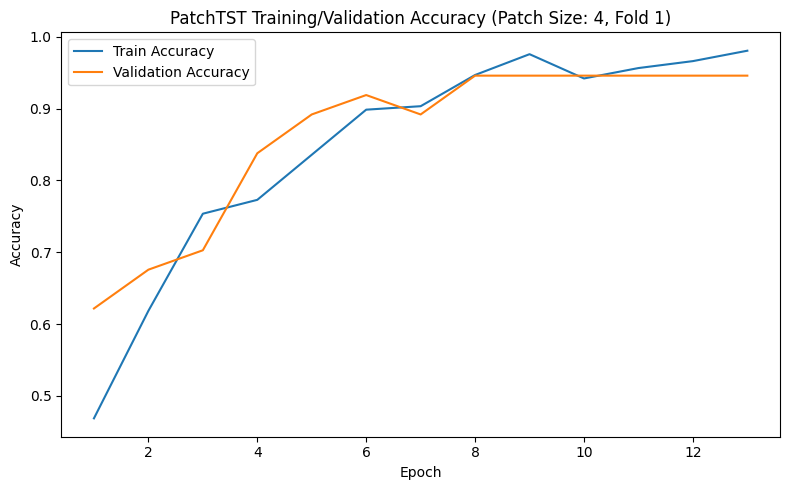


Fold 1 Test Accuracy: 0.9350

===== Fold 2/3 =====
Model Configuration:
Patch size: 4
Number of patches: 12
Patch dimension: 36
d_model: 128
n_heads: 4
n_layers: 3
dropout: 0.005
learning rate: 0.0004
batch size: 128
Epoch  1: Train Acc: 0.3173, Val Acc: 0.6216
Epoch  2: Train Acc: 0.6779, Val Acc: 0.8108
Epoch  3: Train Acc: 0.8221, Val Acc: 0.8108
Epoch  4: Train Acc: 0.8413, Val Acc: 0.8378
Epoch  5: Train Acc: 0.8990, Val Acc: 0.8919
Epoch  6: Train Acc: 0.9375, Val Acc: 0.8919
Epoch  7: Train Acc: 0.9615, Val Acc: 0.8919
Epoch  8: Train Acc: 0.9904, Val Acc: 0.8919
Epoch  9: Train Acc: 0.9952, Val Acc: 0.9189
Epoch 10: Train Acc: 0.9808, Val Acc: 0.9459
Epoch 11: Train Acc: 1.0000, Val Acc: 0.8919
Epoch 12: Train Acc: 1.0000, Val Acc: 0.9459
Epoch 13: Train Acc: 0.9904, Val Acc: 0.9189
Epoch 14: Train Acc: 0.9904, Val Acc: 0.8649
Epoch 15: Train Acc: 1.0000, Val Acc: 0.9459
Early stopping!


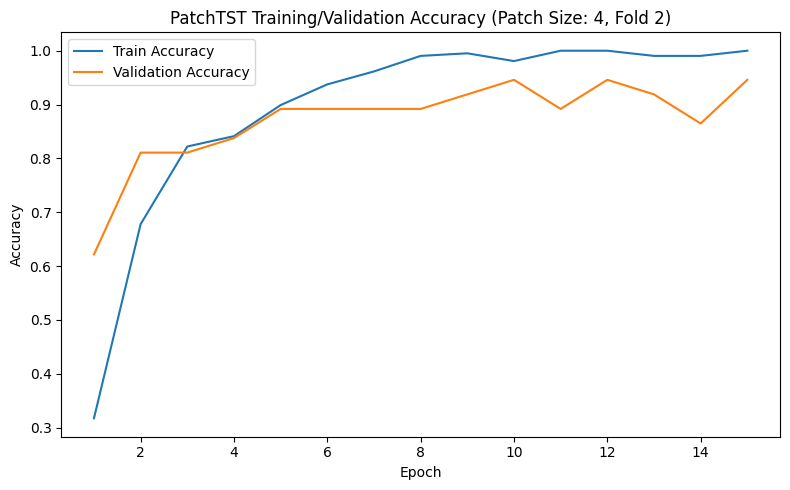


Fold 2 Test Accuracy: 0.9754

===== Fold 3/3 =====
Model Configuration:
Patch size: 4
Number of patches: 12
Patch dimension: 36
d_model: 128
n_heads: 4
n_layers: 3
dropout: 0.005
learning rate: 0.0004
batch size: 128
Epoch  1: Train Acc: 0.4904, Val Acc: 0.7297
Epoch  2: Train Acc: 0.7404, Val Acc: 0.7838
Epoch  3: Train Acc: 0.8125, Val Acc: 0.8108
Epoch  4: Train Acc: 0.8894, Val Acc: 0.8378
Epoch  5: Train Acc: 0.9327, Val Acc: 0.7838
Epoch  6: Train Acc: 0.9231, Val Acc: 0.8649
Epoch  7: Train Acc: 0.9471, Val Acc: 0.8649
Epoch  8: Train Acc: 0.9567, Val Acc: 0.8919
Epoch  9: Train Acc: 0.9760, Val Acc: 0.8378
Epoch 10: Train Acc: 0.9663, Val Acc: 0.8649
Epoch 11: Train Acc: 0.9760, Val Acc: 0.8649
Epoch 12: Train Acc: 0.9760, Val Acc: 0.8378
Epoch 13: Train Acc: 0.9904, Val Acc: 0.9189
Epoch 14: Train Acc: 0.9952, Val Acc: 0.8919
Epoch 15: Train Acc: 1.0000, Val Acc: 0.8649
Epoch 16: Train Acc: 1.0000, Val Acc: 0.8649
Epoch 17: Train Acc: 1.0000, Val Acc: 0.8649
Epoch 18: Train A

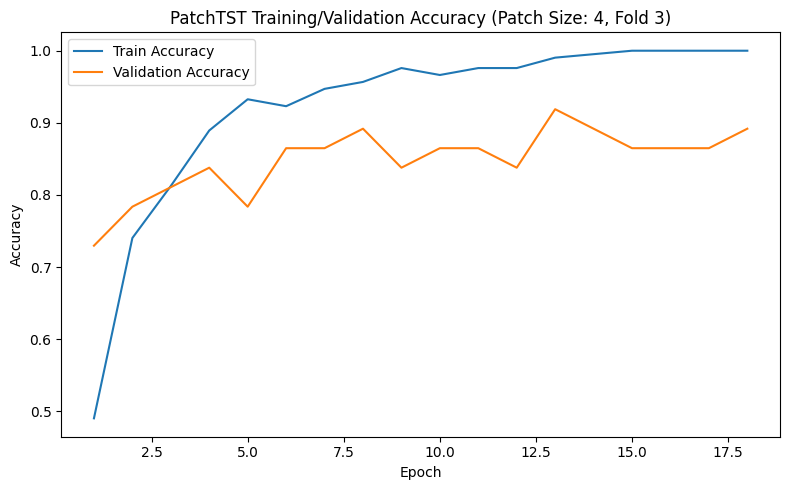


Fold 3 Test Accuracy: 0.9344

=== FINAL CROSS-VALIDATION SUMMARY ===
Fold 1 Test Accuracy: 0.9350
Fold 2 Test Accuracy: 0.9754
Fold 3 Test Accuracy: 0.9344
Mean Test Accuracy: 0.9483
Std Test Accuracy: 0.0192

=== TRAINING FINAL MODEL ON FULL DATA ===
[FINAL MODEL] Epoch  1: Train Acc: 0.5756, Val Acc: 0.7500
[FINAL MODEL] Epoch  2: Train Acc: 0.7428, Val Acc: 0.7500
[FINAL MODEL] Epoch  3: Train Acc: 0.8585, Val Acc: 0.8929
[FINAL MODEL] Epoch  4: Train Acc: 0.8971, Val Acc: 0.9107
[FINAL MODEL] Epoch  5: Train Acc: 0.9357, Val Acc: 0.9464
[FINAL MODEL] Epoch  6: Train Acc: 0.9646, Val Acc: 0.9643
[FINAL MODEL] Epoch  7: Train Acc: 0.9743, Val Acc: 0.9464
[FINAL MODEL] Epoch  8: Train Acc: 0.9711, Val Acc: 0.9464
[FINAL MODEL] Epoch  9: Train Acc: 0.9743, Val Acc: 0.9643
[FINAL MODEL] Epoch 10: Train Acc: 0.9968, Val Acc: 0.9107
[FINAL MODEL] Epoch 11: Train Acc: 0.9968, Val Acc: 0.9464
[FINAL MODEL] Early stopping!


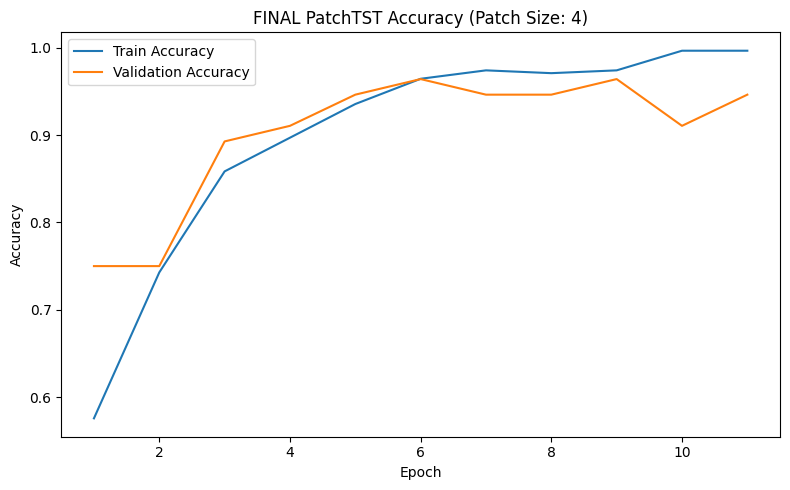


✅ Final Model Accuracy on Entire Dataset: 0.9918


In [7]:
import pickle
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt

# ==== CONFIGURABLE PARAMETERS ====
SEQUENCE_LENGTH = 50  # Set your sequence length here
STEP = 5
N_CLASSES = 5          # Set your number of classes here
N_FEATURES = 10        # Set your number of features here
EARLY_STOPPING_PATIENCE = 5
WEIGHT_DECAY = 1e-4
AUGMENT_NOISE_STD = 0.01
PATCH_SIZE = 4# You can change this:  8, 16, 32
D_MODEL = 128
N_HEADS = 4
N_LAYERS = 3
DROPOUT = 0.005
LEARNING_RATE = 0.0004
BATCH_SIZE = 128
EPOCHS = 100
# =================================

# 1. Load processed data
df = pd.read_csv('combined_dataset_II.csv')
seqgen = SequenceGenerator(df, sequence_length=SEQUENCE_LENGTH,step = STEP)
X,y = seqgen.generate_sequences()
X = np.array(X)
y = np.array(y)
# 4. PatchTST Model
class PatchTST(nn.Module):
    def __init__(self, n_patches, patch_dim, n_classes=N_CLASSES, d_model=128, n_heads=4, n_layers=2, dropout=0.1):
        super().__init__()
        self.input_proj = nn.Linear(patch_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=n_heads, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.norm = nn.LayerNorm(d_model)
        self.head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(n_patches * d_model, 128),
            nn.ReLU(),
            nn.Linear(128, n_classes)
        )
    # 2. Patchify function
    def patchify(X, patch_size):
        # X: (samples, seq_len, n_features)
        n_samples, seq_len, n_features = X.shape
        n_patches = seq_len // patch_size
        X = X[:, :n_patches*patch_size, :]  # Trim to fit
        X = X.reshape(n_samples, n_patches, patch_size * n_features)
        return X


    def forward(self, x):
        x = self.input_proj(x)
        x = self.transformer(x)
        x = self.norm(x)
        return self.head(x)

# 5. Training and evaluation functions
def train_one_epoch(model, optimizer, loss_fn, X, y, batch_size, augment_noise_std=0.0):
    model.train()
    idx = np.random.permutation(len(X))
    X, y = X[idx], y[idx]
    total_loss, correct, total = 0, 0, 0
    for i in range(0, len(X), batch_size):
        xb = X[i:i+batch_size].to(device)
        yb = y[i:i+batch_size].to(device)
        if augment_noise_std > 0:
            noise = torch.randn_like(xb) * augment_noise_std
            xb = xb + noise
        optimizer.zero_grad()
        out = model(xb)
        loss = loss_fn(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * len(xb)
        correct += (out.argmax(dim=1) == yb).sum().item()
        total += len(xb)
    return total_loss / total, correct / total

def evaluate(model, loss_fn, X, y, batch_size):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for i in range(0, len(X), batch_size):
            xb = X[i:i+batch_size].to(device)
            yb = y[i:i+batch_size].to(device)
            out = model(xb)
            loss = loss_fn(out, yb)
            total_loss += loss.item() * len(xb)
            correct += (out.argmax(dim=1) == yb).sum().item()
            total += len(xb)
    return total_loss / total, correct / total



# 3. Stratified K-Fold Training
K_FOLDS = 3
skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)
test_accuracies = []

for fold, (trainval_idx, test_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n===== Fold {fold}/{K_FOLDS} =====")
    X_trainval, X_test = X[trainval_idx], X[test_idx]
    y_trainval, y_test = y[trainval_idx], y[test_idx]
    # Further split trainval into train/val
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=0.15, random_state=42, stratify=y_trainval)

    # Patchify
    X_train = patchify(X_train, PATCH_SIZE)
    X_val = patchify(X_val, PATCH_SIZE)
    X_test_fold = patchify(X_test, PATCH_SIZE)

    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    X_test_fold = torch.tensor(X_test_fold, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    y_val = torch.tensor(y_val, dtype=torch.long)
    y_test_fold = torch.tensor(y_test, dtype=torch.long)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # 4. PatchTST Model
    n_patches = X_train.shape[1]
    patch_dim = X_train.shape[2]
    n_classes = N_CLASSES

    model = PatchTST(n_patches, patch_dim, n_classes,
                     d_model=D_MODEL,
                     n_heads=N_HEADS,
                     n_layers=N_LAYERS,
                     dropout=DROPOUT).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    loss_fn = nn.CrossEntropyLoss()

    print(f"Model Configuration:")
    print(f"Patch size: {PATCH_SIZE}")
    print(f"Number of patches: {n_patches}")
    print(f"Patch dimension: {patch_dim}")
    print(f"d_model: {D_MODEL}")
    print(f"n_heads: {N_HEADS}")
    print(f"n_layers: {N_LAYERS}")
    print(f"dropout: {DROPOUT}")
    print(f"learning rate: {LEARNING_RATE}")
    print(f"batch size: {BATCH_SIZE}")

    # 7. Training loop
    train_accs, val_accs = [], []
    best_val_acc = 0
    patience_counter = 0

    for epoch in range(1, EPOCHS + 1):
        train_loss, train_acc = train_one_epoch(model, optimizer, loss_fn, X_train, y_train, BATCH_SIZE, augment_noise_std=AUGMENT_NOISE_STD)
        val_loss, val_acc = evaluate(model, loss_fn, X_val, y_val, BATCH_SIZE)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        print(f'Epoch {epoch:2d}: Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')

        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= EARLY_STOPPING_PATIENCE:
            print('Early stopping!')
            break

    # 8. Plot accuracy curves
    plt.figure(figsize=(8,5))
    plt.plot(range(1, len(train_accs)+1), train_accs, label='Train Accuracy')
    plt.plot(range(1, len(val_accs)+1), val_accs, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'PatchTST Training/Validation Accuracy (Patch Size: {PATCH_SIZE}, Fold {fold})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 9. Test accuracy for this fold
    test_loss, test_acc = evaluate(model, loss_fn, X_test_fold, y_test_fold, BATCH_SIZE)
    print(f'\nFold {fold} Test Accuracy: {test_acc:.4f}')
    test_accuracies.append(test_acc)

# 10. Print final summary
print("\n=== FINAL CROSS-VALIDATION SUMMARY ===")
for i, acc in enumerate(test_accuracies, 1):
    print(f"Fold {i} Test Accuracy: {acc:.4f}")
print(f"Mean Test Accuracy: {np.mean(test_accuracies):.4f}")
print(f"Std Test Accuracy: {np.std(test_accuracies):.4f}")








print("\n=== TRAINING FINAL MODEL ON FULL DATA ===")

# Split again: 85% train, 15% validation (optional, for early stopping)
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# Patchify
X_train_full = patchify(X_train_full, PATCH_SIZE)
X_val_full = patchify(X_val_full, PATCH_SIZE)

X_train_full = torch.tensor(X_train_full, dtype=torch.float32)
X_val_full = torch.tensor(X_val_full, dtype=torch.float32)
y_train_full = torch.tensor(y_train_full, dtype=torch.long)
y_val_full = torch.tensor(y_val_full, dtype=torch.long)

# Model params
n_patches = X_train_full.shape[1]
patch_dim = X_train_full.shape[2]
n_classes = N_CLASSES

model = PatchTST(n_patches, patch_dim, n_classes,
                 d_model=D_MODEL,
                 n_heads=N_HEADS,
                 n_layers=N_LAYERS,
                 dropout=DROPOUT).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
loss_fn = nn.CrossEntropyLoss()

# Final training loop
final_train_accs, final_val_accs = [], []
best_val_acc = 0
patience_counter = 0

for epoch in range(1, EPOCHS + 1):
    train_loss, train_acc = train_one_epoch(model, optimizer, loss_fn, X_train_full, y_train_full, BATCH_SIZE, augment_noise_std=AUGMENT_NOISE_STD)
    val_loss, val_acc = evaluate(model, loss_fn, X_val_full, y_val_full, BATCH_SIZE)
    final_train_accs.append(train_acc)
    final_val_accs.append(val_acc)
    print(f'[FINAL MODEL] Epoch {epoch:2d}: Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1
    if patience_counter >= EARLY_STOPPING_PATIENCE:
        print('[FINAL MODEL] Early stopping!')
        break

# Load best model
model.load_state_dict(best_model_state)

# Plot final training/validation accuracy
plt.figure(figsize=(8,5))
plt.plot(range(1, len(final_train_accs)+1), final_train_accs, label='Train Accuracy')
plt.plot(range(1, len(final_val_accs)+1), final_val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(f'FINAL PatchTST Accuracy (Patch Size: {PATCH_SIZE})')
plt.legend()
plt.tight_layout()
plt.show()



# Optional: Evaluate final model on full dataset (patchified)
X_all = patchify(X, PATCH_SIZE)
X_all = torch.tensor(X_all, dtype=torch.float32).to(device)
y_all = torch.tensor(y, dtype=torch.long).to(device)

final_loss, final_acc = evaluate(model, loss_fn, X_all, y_all, BATCH_SIZE)
print(f"\n✅ Final Model Accuracy on Entire Dataset: {final_acc:.4f}")


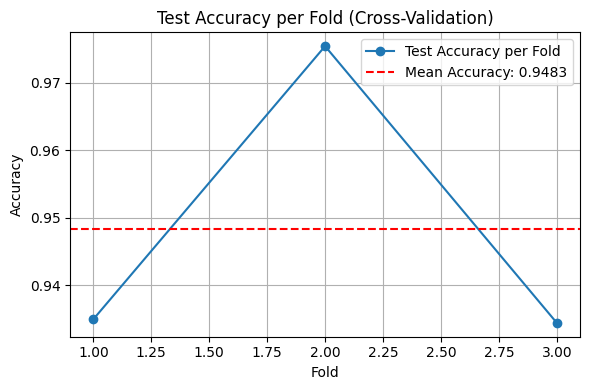


=== Final Model Evaluation on Full Dataset ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           2       1.00      0.99      0.99       226
           3       1.00      1.00      1.00         8
           4       0.98      0.99      0.99       108

    accuracy                           0.99       367
   macro avg       0.99      1.00      0.99       367
weighted avg       0.99      0.99      0.99       367



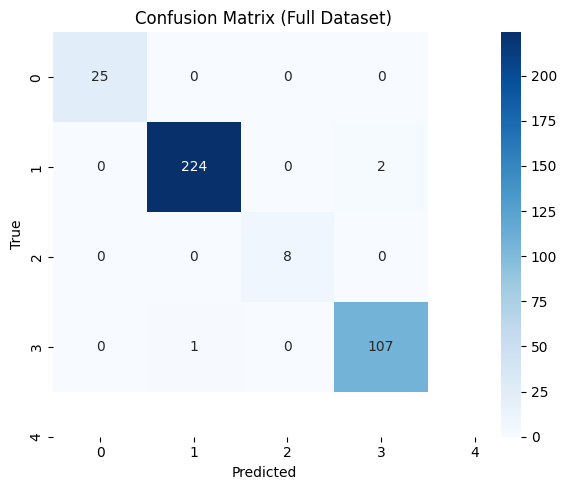

In [8]:
# ===== FINAL EVALUATION & VISUALIZATION =====

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Plot Test Accuracy per Fold
plt.figure(figsize=(6,4))
plt.plot(range(1, len(test_accuracies)+1), test_accuracies, marker='o', label='Test Accuracy per Fold')
plt.axhline(np.mean(test_accuracies), color='red', linestyle='--', label=f"Mean Accuracy: {np.mean(test_accuracies):.4f}")
plt.title('Test Accuracy per Fold (Cross-Validation)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Confusion Matrix & Classification Report (on full data)

# Patchify entire data
X_all = patchify(X, PATCH_SIZE)
X_all = torch.tensor(X_all, dtype=torch.float32).to(device)
y_all = torch.tensor(y, dtype=torch.long).to(device)

model.eval()
all_preds = []

with torch.no_grad():
    for i in range(0, len(X_all), BATCH_SIZE):
        xb = X_all[i:i+BATCH_SIZE]
        preds = model(xb).argmax(dim=1)
        all_preds.append(preds.cpu().numpy())

all_preds = np.concatenate(all_preds)

# Print classification report
print("\n=== Final Model Evaluation on Full Dataset ===")
print(classification_report(y, all_preds))

# Confusion matrix
cm = confusion_matrix(y, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(N_CLASSES)], yticklabels=[str(i) for i in range(N_CLASSES)])
plt.title("Confusion Matrix (Full Dataset)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
